In [1]:
import requests

In [2]:
def get_stock_data(stock_symbol, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{stock_symbol}/prices?'
    token = '92549df1ba9e9e2d4d3c7c916a312b5f665a92a4'
    payload = {
        'startDate': start_date,
        'endDate': end_date,
        'token': token
    }
    response = requests.get(base_url, params=payload)
    return response

In [3]:
response = get_stock_data('AAPL', '2019-1-1', '2019-5-2')
print(response.url)
print(response.json())

https://api.tiingo.com/tiingo/daily/AAPL/prices?startDate=2019-1-1&endDate=2019-5-2&token=92549df1ba9e9e2d4d3c7c916a312b5f665a92a4
[{'date': '2019-01-02T00:00:00.000Z', 'close': 157.92, 'high': 158.85, 'low': 154.23, 'open': 154.89, 'volume': 37039700, 'adjClose': 154.5074231718, 'adjHigh': 155.4173263097, 'adjLow': 150.897162334, 'adjOpen': 151.5429000448, 'adjVolume': 37039700, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-01-03T00:00:00.000Z', 'close': 142.19, 'high': 145.72, 'low': 142.0, 'open': 143.98, 'volume': 91312200, 'adjClose': 139.1173410638, 'adjHigh': 142.5710594262, 'adjLow': 138.9314468743, 'adjOpen': 140.8686600068, 'adjVolume': 91312200, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2019-01-04T00:00:00.000Z', 'close': 148.26, 'high': 148.55, 'low': 143.8, 'open': 144.53, 'volume': 58607100, 'adjClose': 145.0561712224, 'adjHigh': 145.339904459, 'adjLow': 140.692549722, 'adjOpen': 141.4067747658, 'adjVolume': 58607100, 'divCash': 0.0, 'splitFactor': 1.0}, {'date

In [4]:
def parse_data(data_response):
    json_data = data_response.json()
    dates = []
    closes =[]
    opens = []
    highs = []
    lows = []
    vols = []
    for json_object in json_data:
        dates.append(json_object['date'])
        closes.append(json_object['close'])
        opens.append(json_object['open'])
        highs.append(json_object['high'])
        lows.append(json_object['low'])
        vols.append(json_object['volume'])
    return dates, closes, opens, highs, lows, vols

In [5]:
dates, closes, opens, highs, lows, vols = parse_data(response)
print(dates)


['2019-01-02T00:00:00.000Z', '2019-01-03T00:00:00.000Z', '2019-01-04T00:00:00.000Z', '2019-01-07T00:00:00.000Z', '2019-01-08T00:00:00.000Z', '2019-01-09T00:00:00.000Z', '2019-01-10T00:00:00.000Z', '2019-01-11T00:00:00.000Z', '2019-01-14T00:00:00.000Z', '2019-01-15T00:00:00.000Z', '2019-01-16T00:00:00.000Z', '2019-01-17T00:00:00.000Z', '2019-01-18T00:00:00.000Z', '2019-01-22T00:00:00.000Z', '2019-01-23T00:00:00.000Z', '2019-01-24T00:00:00.000Z', '2019-01-25T00:00:00.000Z', '2019-01-28T00:00:00.000Z', '2019-01-29T00:00:00.000Z', '2019-01-30T00:00:00.000Z', '2019-01-31T00:00:00.000Z', '2019-02-01T00:00:00.000Z', '2019-02-04T00:00:00.000Z', '2019-02-05T00:00:00.000Z', '2019-02-06T00:00:00.000Z', '2019-02-07T00:00:00.000Z', '2019-02-08T00:00:00.000Z', '2019-02-11T00:00:00.000Z', '2019-02-12T00:00:00.000Z', '2019-02-13T00:00:00.000Z', '2019-02-14T00:00:00.000Z', '2019-02-15T00:00:00.000Z', '2019-02-19T00:00:00.000Z', '2019-02-20T00:00:00.000Z', '2019-02-21T00:00:00.000Z', '2019-02-22T00:00:0

In [6]:
def calculate_price_difference(opens, closes):
    price_differences = []
    for i in range(len(opens) - 1):
        if opens[i + 1] >= closes[i]:
            price_differences.append([1, 0])
        else:
            price_differences.append([0, 1])
    return price_differences

In [7]:
price_differences = calculate_price_difference(opens, closes)
differences = []
for difference in price_differences:
    differences.append(difference[0])

In [8]:
import matplotlib.pyplot as plt

plt.plot(dates[1:], opens[1:])
plt.plot(dates[1:], closes[:-1])
plt.show()

<Figure size 640x480 with 1 Axes>

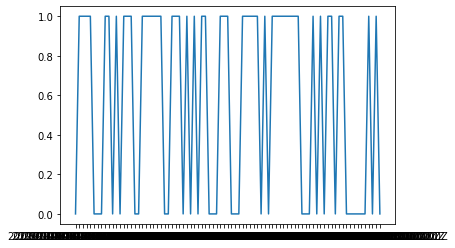

In [9]:
plt.plot(dates[1:], differences)
plt.show()

In [10]:
def create_datasets(stock_symbol, start_date, end_date):
    response = get_stock_data(stock_symbol, start_date, end_date)
    dates, closes, opens, highs, lows, vols = parse_data(response)
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000])
    
    return inputs, labels

In [11]:
x_train, y_train = create_datasets('AAPL', '2018-1-1', '2019-4-1')
x_test, y_test = create_datasets('AAPL', '2019-4-1', '2019-5-2')

In [12]:
# y = Wx + b
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [13]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 5])
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])
W = tf.Variable(initial_value=tf.ones(shape=[5, 2]))
b = tf.Variable(initial_value=tf.ones(shape=[2]))
y_output = tf.add(tf.matmul(x_input, W), b)

In [14]:
loss = tf.reduce_sum(tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        labels=y_input, logits=y_output)))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_step = optimizer.minimize(loss)

In [15]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:
            num_correct += 1
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1
    return (num_correct / len(actual)) * 100

In [16]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [17]:
for _ in range(20000):
    session.run(train_step, feed_dict={x_input: x_train, y_input: y_train})
print(measure_accuracy(session.run(
    y_output, feed_dict={x_input: x_test}), y_test))

36.36363636363637


In [37]:
print(session.run(
    y_output, feed_dict={x_input: x_test}), y_test)

[[  6104632.   -6028121.5]
 [  4956441.5  -4894545.5]
 [  5637726.5  -5567168. ]
 [  4437242.5  -4381991.5]
 [  5702451.   -5631079.5]
 [  4762265.   -4702863. ]
 [  4701472.5  -4642859.5]
 [  3729325.2  -3683080.2]
 [  3802820.8  -3755650. ]
 [  4155144.2  -4103496.2]
 [  3598647.   -3554085.2]
 [  4391173.5  -4336541.5]
 [  3471947.5  -3429014.8]
 [  5676226.   -5605215.5]
 [ 10491762.  -10359434. ]
 [  5934807.5  -5860449.5]
 [  5488991.5  -5420294.5]
 [  4653877.5  -4595804.5]
 [  4588985.5  -4531743.5]
 [  5796213.5  -5723599. ]
 [  6862099.5  -6775931. ]
 [  8617234.   -8508756. ]
 [ 10665548.  -10531063. ]
 [  5562487.   -5492941. ]
 [  9047026.   -8933174. ]
 [  6891299.   -6804910.5]
 [  4682751.5  -4624463.5]
 [  3868454.8  -3820538. ]
 [  4622173.5  -4564682.5]
 [  4342772.   -4288835.5]
 [  3488498.5  -3445430.5]
 [  3944162.   -3895280. ]
 [  3236014.   -3196149.2]
 [  2939538.   -2903448.2]
 [  3096457.5  -3058365.8]
 [  3113951.5  -3075645. ]
 [  2617092.   -2585107. ]
 